# Pymaceuticals Inc.
---

### Analysis

- The correlation between mouse weight and the average tumor volume is 0.84
    This is a very high correlation between the weight and tumor volume when on the Capomulin treatment. With a strong correlation like that, the Capomulin treatment may cause the rat's weight to increase. 
- Furthermore the capomulin standard deviation is 4.994774, which is the second lowest std out of all the treatments. This means the data points are tightly spread meaning rats are heavier more consistently on the Capomulin treatment.
- Of course we can't ignore that we have more data on the Capomulin treatment. With more data on the other treatments, their stds may be similar. This really means we have an accurate look on the effects of the Capomulin treatment while we have less accurate looks of other treatments. While its obvious there is a correlation between Capomulin and tumor weight, we may not have enough data to prove other treatments have the same effect. 

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Output the merged DataFrame to a new CSV file
merged_df.to_csv("data/Merged_data.csv", index=False)

In [4]:
# Checking the number of mice.
unique_mouse_count = len(mouse_metadata["Mouse ID"].unique())
entry_count = len(merged_df["Mouse ID"])
print(f"There are {unique_mouse_count} unique mice in the study with {entry_count} total entries.")

There are 249 unique mice in the study with 1893 total entries.


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = merged_df.loc[merged_df["Mouse ID"] == "g989"]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"] != "g989"]
clean_df.head(2000)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Output the merged DataFrame to a new CSV file
clean_df.to_csv("data/Cleaned_data.csv", index=False)

In [9]:
# Checking the number of mice in the clean DataFrame.
clean_unique_mouse_count = len(clean_df["Mouse ID"].unique())
clean_entry_count = len(clean_df["Mouse ID"])
print(f"There are {clean_unique_mouse_count} unique mice in the study with {clean_entry_count} total entries.")

There are 248 unique mice in the study with 1880 total entries.


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
clean_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
clean_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
clean_variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
clean_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
clean_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({
    "Mean": clean_mean,
    "Median": clean_median,
    "Variance": clean_variance,
    "Standard Deviation": clean_std,
    "SEM": clean_sem
})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Total Number of Rows per Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

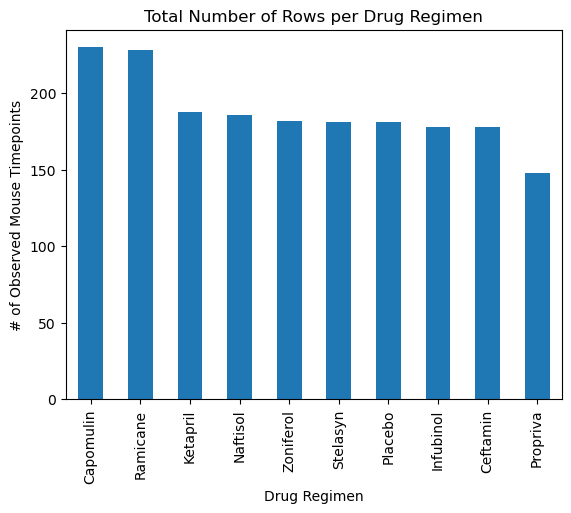

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = clean_df["Drug Regimen"].value_counts()
drug_regimen.plot(kind="bar", title="Total Number of Rows per Drug Regimen", ylabel="# of Observed Mouse Timepoints",
                  xlabel="Drug Regimen")

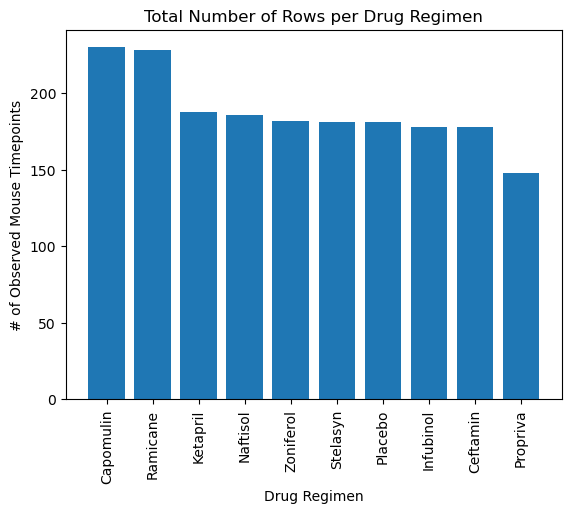

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen.index.values, drug_regimen.values)
plt.title("Total Number of Rows per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

There are 958 male mice and 922 female mice.


<Axes: ylabel='count'>

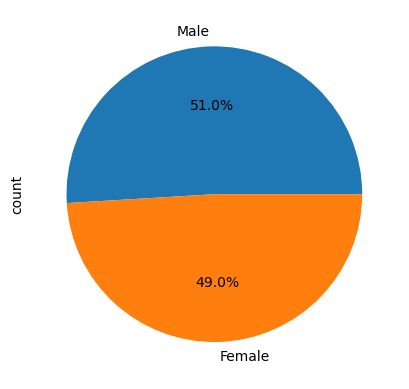

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_df["Sex"].value_counts()
male_mice = sex_counts["Male"]
female_mice = sex_counts["Female"]
print(f"There are {male_mice} male mice and {female_mice} female mice.")
clean_df['Sex'].value_counts().plot.pie(autopct='%1.1f%%')


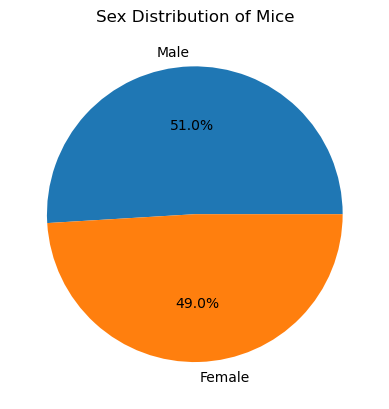

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
plt.pie(sex_counts, labels=labels, autopct='%1.1f%%')
plt.title("Sex Distribution of Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_volume_all = clean_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].max()
# tumor_volume_all

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_merge = pd.merge(tumor_volume_all, clean_df, on=["Mouse ID", "Tumor Volume (mm3)"], how="left")
tumor_merge

,Mouse ID,Tumor Volume (mm3),Timepoint,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,67.973419,45,2,Infubinol,Female,20,23
1,a251,65.525743,45,1,Infubinol,Female,21,25
2,a262,70.717621,45,4,Placebo,Female,17,29
3,a275,62.999356,45,3,Ceftamin,Female,20,28
4,a366,63.440686,30,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,48.710661,10,0,Propriva,Female,12,26
244,z578,45.000000,0,0,Ramicane,Male,11,16
245,z581,62.754451,45,3,Infubinol,Female,24,25
246,z795,65.741070,45,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
volume_emmpty_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = tumor_merge.loc[tumor_merge["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    volume_emmpty_list.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"{treatment} IQR is {iqr}")


# ###Reference Material###
# countries = {}
# for lending_type in lending_types.split(","):
#     query = f"countries?lendingType={lending_type}&format=json"
#     response = requests.get(url + query).json()
#     countries[lending_type] = response[0]["total"]

# # loop through TV show titles, make requests and parse
# for name in show_list:
#     response = requests.get(url+name).json()
#     name_list.append(response['name'])
#     rating_list.append(response['rating'])

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


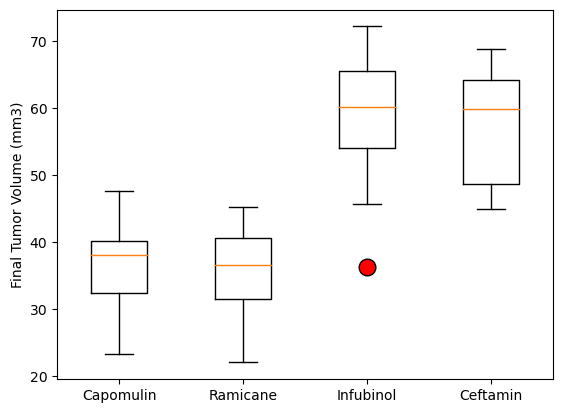

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(volume_emmpty_list, labels=treatment_list)
plt.title("Tumor Volume Distribution by Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

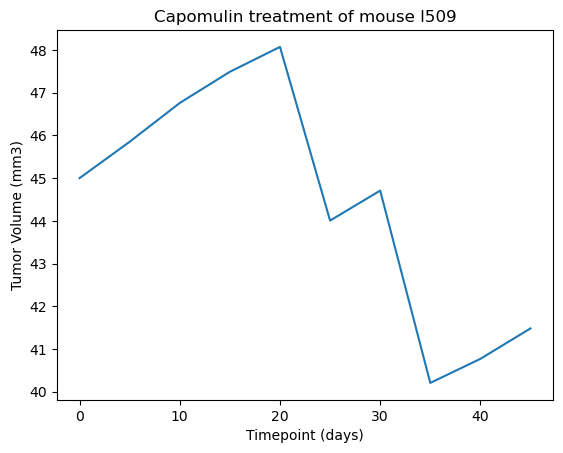

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(clean_df.loc[clean_df["Mouse ID"] == "s185", "Timepoint"], clean_df.loc[clean_df["Mouse ID"] == "s185", "Tumor Volume (mm3)"])
plt.title("Tumor Volume vs Timepoint for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

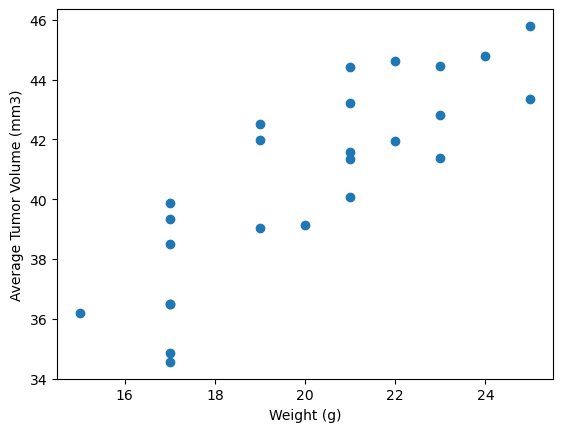

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]    
cap_tumor_mean = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
cap_mouse_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(cap_mouse_weight, cap_tumor_mean)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs. Average Tumor Volume for Capomulin")
plt.show()

# plt.scatter(clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", "Weight (g)"], clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"])



## Correlation and Regression

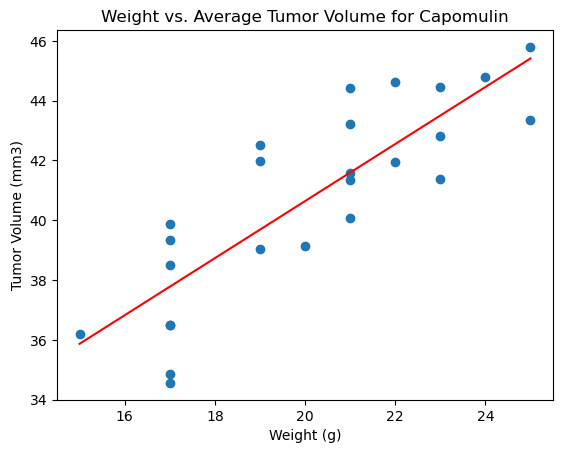

The correlation between mouse weight and the average tumor volume is 0.84


In [35]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation and linear regression
correlation = st.pearsonr(cap_mouse_weight, cap_tumor_mean)
linear_regression = st.linregress(cap_mouse_weight, cap_tumor_mean)

# Generate the x values of the regression line (from the minimum to the maximum mouse weight)
x_values = np.linspace(min(cap_mouse_weight), max(cap_mouse_weight), 100)

# Generate the y values of the regression line
y_values = linear_regression.slope * x_values + linear_regression.intercept

# Generate a scatter plot
plt.scatter(cap_mouse_weight, cap_tumor_mean)
plt.plot(x_values, y_values, color='red')  # Add the regression line
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs. Average Tumor Volume for Capomulin")
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")